<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f381.svg" alt="bonus icon" width="32" style="vertical-align:middle"> ***Part 5 -- Bonus***

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing

print("All imports complete")


All imports complete


<div style="color:black; font-weight:bold">

Section 1 - Data Acquisition

</div>

In [10]:
# Load dataset
california = fetch_california_housing()

# Print description, dataset id/label, shape and feature names
print(california.DESCR)
print("\ncalifornia_housing_dataset")
print("data.shape:", california.data.shape)
print("feature_names:", california.feature_names)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<div style="color:black; font-weight:bold">

Section 2 - Exploring the Data

</div>

In [11]:
# Quick inspection of the California housing dataset
print('Available keys:', list(california.keys()))
print('data.shape:', california.data.shape)
print('target.shape:', california.target.shape)
print('feature_names:', list(california.feature_names))

import pandas as pd
import html
from IPython.display import display, HTML

df_cal = pd.DataFrame(california.data, columns=california.feature_names)
df_cal['MedHouseVal'] = california.target

print('\nFirst 5 rows:')
print(df_cal.head().to_string(index=False))

print('\nSummary statistics:')
print(df_cal.describe().round(3).to_string())

# Display the full dataset description in a scrollable HTML block to avoid UI truncation
descr_html = html.escape(california.DESCR).replace('\n', '<br>')
display(HTML(f'<div style="max-height:400px; overflow:auto; white-space:pre-wrap; font-family:monospace; background:#f7f7f7; padding:10px; border:1px solid #ddd;>{descr_html}</div>'))

# Also save the full description to a text file for offline reading
with open('california_housing_DESCR.txt', 'w', encoding='utf-8') as f:
    f.write(california.DESCR)
print('\nWrote california_housing_DESCR.txt to the notebook working directory.')
# Redisplay the description in a full-width, responsive container so it fits the notebook page
display(HTML(
    f'<div style="width:100%; max-width:100%; box-sizing:border-box; overflow:auto; white-space:pre-wrap; '
    f'word-wrap:break-word; font-family:monospace; font-size:12px; background:#f7f7f7; padding:10px; '
    f'border:1px solid #ddd;">{descr_html}</div>'
))

Available keys: ['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']
data.shape: (20640, 8)
target.shape: (20640,)
feature_names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows:
 MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
 8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23        4.526
 8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22        3.585
 7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24        3.521
 5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25        3.413
 3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25        3.422

Summary statistics:
          MedInc   HouseAge   AveRooms  AveBedrms  Population   AveOccup   Latitude  Longitude  MedHouseVal
count  20640.000  20640.000  20640.000  


Wrote california_housing_DESCR.txt to the notebook working directory.


<div style="color:black; font-weight:bold">

Section 3 - Visualizations

</div>

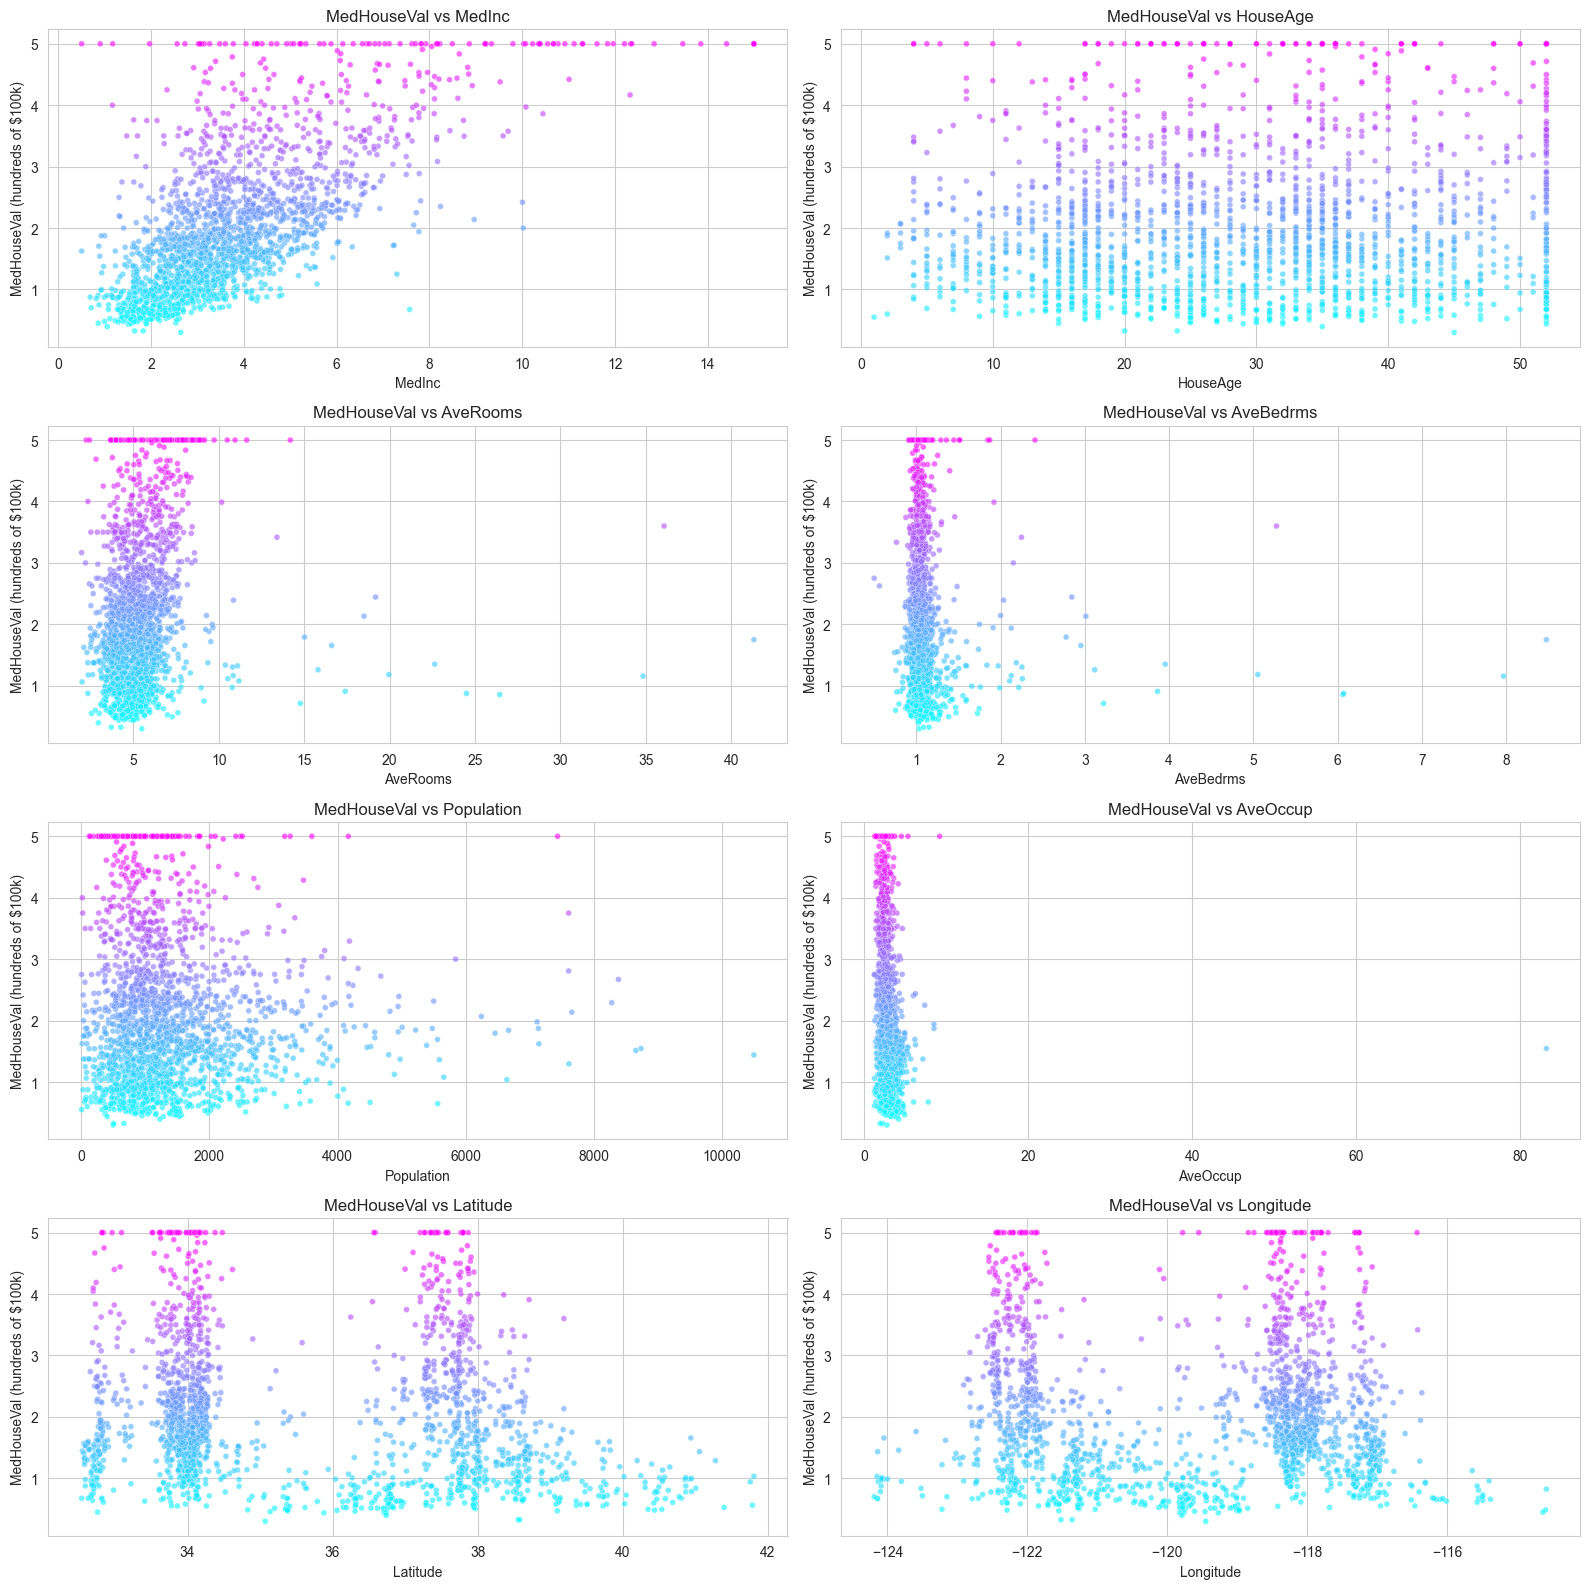

In [18]:
# %matplotlib inline for Jupyter display
%matplotlib inline

sns.set_style("whitegrid")

# Use a subsample of the california dataframe for plotting to avoid very dense plots.
# df_cal is already defined in the notebook (created from the california dataset).
sample_df = df_cal.sample(n=2000, random_state=42).copy()

# create the lowercase column requested for y/hue
sample_df['medhousevalue'] = sample_df['MedHouseVal']

features = california.feature_names

# layout: 3 columns
ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 3 * nrows))
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]
    sns.scatterplot(
        data=sample_df,
        x=feat,
        y='medhousevalue',
        hue='medhousevalue',
        palette='cool',
        s=18,
        alpha=0.6,
        ax=ax,
        legend=False
    )
    ax.set_title(f"MedHouseVal vs {feat}")
    ax.set_xlabel(feat)
    ax.set_ylabel('MedHouseVal (hundreds of $100k)')

# hide any unused subplots
for j in range(len(features), len(axes)):
    axes[j].set_visible(False)
    # Recreate layout: 2 columns x 4 rows (each subplot wider to fill page)
    plt.close(fig)  # close the previous figure to free resources

    ncols = 2
    nrows = 4
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
    axes = axes.flatten()

    for i, feat in enumerate(features):
        ax = axes[i]
        sns.scatterplot(
            data=sample_df,
            x=feat,
            y='medhousevalue',
            hue='medhousevalue',
            palette='cool',
            s=18,
            alpha=0.6,
            ax=ax,
            legend=False
        )
        ax.set_title(f"MedHouseVal vs {feat}")
        ax.set_xlabel(feat)
        ax.set_ylabel('MedHouseVal (hundreds of $100k)')

    # hide any unused subplots (if any)
    for j in range(len(features), len(axes)):
        axes[j].set_visible(False)
plt.tight_layout()
plt.show()

<div style="color:black; font-weight:bold">

Section 4 - Splitting the Data for Training and Testing

</div>

In [13]:
from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    california.data, california.target, random_state=4211
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (15480, 8)
X_test shape: (5160, 8)


<div style="color:black; font-weight:bold">

Section 5 - Training the Model

</div>

In [14]:
from sklearn.linear_model import LinearRegression

# Instantiate and train the linear regression model on X_train / y_train
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained.")
print(" X_train shape:", getattr(X_train, "shape", None))
print(" y_train shape:", getattr(y_train, "shape", None))
print(" Coefficients:", model.coef_)
print(" Intercept:", model.intercept_)

Model trained.
 X_train shape: (15480, 8)
 y_train shape: (15480,)
 Coefficients: [ 4.40713056e-01  9.57812709e-03 -1.22939868e-01  7.87830032e-01
 -1.75900231e-06 -4.39549310e-03 -4.18833734e-01 -4.33135734e-01]
 Intercept: -36.96015065133308


<div style="color:black; font-weight:bold">

Section 6 - Testing the Model

</div>

In [15]:
# Predict on the test set and store predictions / expected values
predicted = model.predict(X_test)
expected = y_test

# quick sanity check
print("predicted.shape:", getattr(predicted, "shape", None))
print("expected.shape:", getattr(expected, "shape", None))
print("First 5 predicted vs expected:")
for p, e in zip(predicted[:5], expected[:5]):
    print(f"  pred={p:.3f}, exp={e:.3f}")

predicted.shape: (5160,)
expected.shape: (5160,)
First 5 predicted vs expected:
  pred=0.676, exp=0.619
  pred=2.877, exp=2.528
  pred=2.579, exp=3.229
  pred=1.412, exp=0.822
  pred=4.087, exp=5.000


<div style="color:black; font-weight:bold">

Section 7 - Visualizing the Expected vs Predicted Prices

</div>

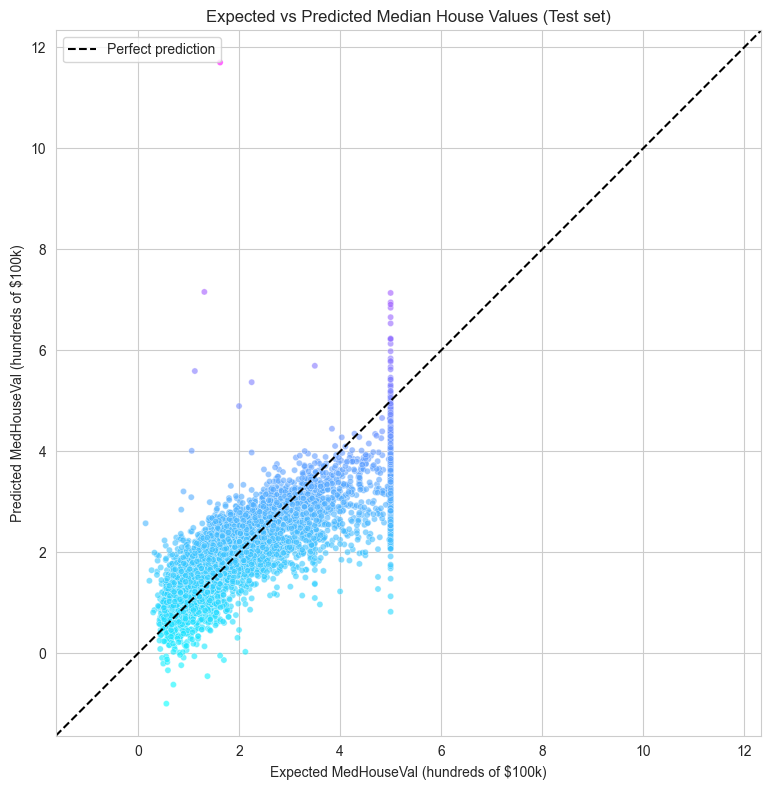

In [16]:
# Create a dataframe of expected vs predicted median house values (test set)
df_expected_pred = pd.DataFrame({
    'Expected': expected,
    'Predicted': predicted
})

# Scatter plot: expected on x-axis, predicted on y-axis
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Single scatterplot colored by predicted values
ax = sns.scatterplot(
    data=df_expected_pred,
    x='Expected',
    y='Predicted',
    hue='Predicted',
    palette='cool',
    s=20,
    alpha=0.6,
    edgecolor='w',
    legend=False
)

# Use the same numeric limits for both axes (with small padding)
vmin = min(df_expected_pred['Expected'].min(), df_expected_pred['Predicted'].min())
vmax = max(df_expected_pred['Expected'].max(), df_expected_pred['Predicted'].max())
pad = 0.05 * (vmax - vmin) if vmax > vmin else 0.1
lims = (vmin - pad, vmax + pad)
ax.set_xlim(lims)
ax.set_ylim(lims)

# Plot the perfect-prediction line (y = x) as a black dashed line
ax.plot(lims, lims, color='black', linestyle='--', linewidth=1.5, label='Perfect prediction')

ax.set_xlabel('Expected MedHouseVal (hundreds of $100k)')
ax.set_ylabel('Predicted MedHouseVal (hundreds of $100k)')
ax.set_title('Expected vs Predicted Median House Values (Test set)')
ax.legend()

# Ensure square aspect so scales look identical
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

<div style="color:black">

**Part 5 — California Housing (Bonus) — Quick Summary**

**1) Key findings of the dataset**
- Dataset size: 20,640 records with 8 numeric features (MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude) and target MedHouseVal (median house value, in hundreds of $100k).
- Strongest visible relationship: median income (MedInc) generally rises with higher median house value — visible in scatter plots.
- Spatial signal: latitude/longitude show geographic structure (prices vary by location).
- Model-level observation: predicted vs expected plot shows the model captures broad trends but has substantial scatter — many predictions deviate from actual values.

**2) Recommendations to the reader**
- Compute and report numeric metrics (R², RMSE, MAE) and cross-validated scores to quantify model skill.
- Add and test alternative models (regularized linear models, tree-based ensembles like RandomForest/GradientBoosting) and compare with linear regression.
- Engineer features (interactions, distance-to-city-center, log transforms for skewed vars) and include spatial encoding or clustering.
- Validate with time- or spatial-aware cross-validation to avoid over-optimistic performance estimates.
- Inspect and handle outliers and extreme population/room values before training.

**3) Practical applications of the information**
- Quick price estimation tool for neighborhoods or block groups (rough median-value prediction).
- Informative exploratory analysis for urban planners, real-estate researchers, and policy makers to identify high/low value regions.
- Baseline model for more advanced property-value systems (to be improved with additional features and models).
- Educational use: demonstrates end-to-end workflow (load data, visualize, split, train, evaluate, visualize results).

**4) Methods used — explained in plain terms**
- Data sampling & plotting: we plotted each feature versus median house value to see which inputs relate to price.
- Train/test split: the dataset was split into a training set to teach the model and a test set to evaluate how it performs on new data.
- Linear regression (the model used): the model learns one weight per feature and a baseline number; predicted price = baseline + sum(weight × feature). It finds the best weights to minimize average error on the training data.
- Evaluation visuals: a scatter of predicted vs expected shows how close the model is to perfect prediction (a 45° line). Spread around that line means prediction errors.
- Diagnostics to try next: residual plots (errors over samples), error histograms, and cross-validation to check robustness.

</div>

<div style="text-align:center; color:black;">
    <img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f389.svg" alt="party popper" width="80" />
    <h2>**Project Complete** 🎉</h2>
    <p><em>End of project — analysis and visualizations complete.</em></p>
</div>
